#### 1.IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import re
import string
import matplotlib.pyplot as plt

In [2]:
#concatenating the two datasets
news1 = pd.read_csv('/kaggle/input/news-summary/news_summary.csv',encoding='ISO-8859-1')
news2 = pd.read_csv('/kaggle/input/news-summary/news_summary_more.csv',encoding='ISO-8859-1')
data = pd.concat([news1, news2], axis=0).reset_index(drop=True)
data

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before be...,http://indiatoday.intoday.in/story/abu-dujana-...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get training to spot signs of s...,http://indiatoday.intoday.in/story/sex-traffic...,Hotels in Maharashtra will train their staff t...,Hotels in Mumbai and other Indian cities are t...
...,...,...,...,...,...,...
102910,NaN,NaN,CRPF jawan axed to death by Maoists in Chhatti...,NaN,A CRPF jawan was on Tuesday axed to death with...,NaN
102911,NaN,NaN,First song from Sonakshi Sinha's 'Noor' titled...,NaN,"'Uff Yeh', the first song from the Sonakshi Si...",NaN
102912,NaN,NaN,'The Matrix' film to get a reboot: Reports,NaN,"According to reports, a new version of the 199...",NaN
102913,NaN,NaN,Snoop Dogg aims gun at clown dressed as Trump ...,NaN,A new music video shows rapper Snoop Dogg aimi...,NaN


In [3]:
data.shape

(102915, 6)

#### 2.PREPROCESSING THE DATA

In [4]:
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from sklearn.model_selection import train_test_split

In [5]:
#removinng and expanding the contractions
mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
"didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
"he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
"I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
"mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
"mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
"oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
"she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
"this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
"we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
"what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
"where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
"why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
"y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
"you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"}

In [6]:
StopWords = set(stopwords.words('english'))
def preprocess(text):
    #1.Converting input to lowercase
    text = text.lower() 
    #2.Removing punctuations and special characters.
    text = re.sub(r'\([^)]*\)', '', text)
    #Removing double quotes.
    text = re.sub('"','', text) 
    #3.Replacing contractions.  
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")]) 
    #4.Eliminating apostrophe.
    text = re.sub(r"'s\b","",text) 
    #5.Removing non-alphabetical characters
    text = re.sub("[^a-zA-Z]", " ", text) 
    #6.Removing stopwords.
    text = ' '.join([word for word in text.split() if word not in StopWords])
    #7.Removing very short words
    text = ' '.join([word for word in text.split() if len(word) >= 3]) 
    return text



In [7]:
#Apply preprocessing to both text and summary
cleaned_text = []
cleaned_summary = []
for text in data['text']:
    cleaned_text.append(preprocess(text))
for summary in data['headlines']:
    cleaned_summary.append(preprocess(summary))
cleaned_data = pd.DataFrame()
cleaned_data['text'] = cleaned_text
cleaned_data['headlines'] = cleaned_summary

#Replacing empty string summaries with nan values and then dropping those datapoints.
cleaned_data['headlines'].replace('', np.nan, inplace=True)
cleaned_data.dropna(axis=0, inplace=True)



In [8]:
#Adding START and END tokens for indication
cleaned_data['headlines'] = cleaned_data['headlines'].apply(lambda x: '<START>' + ' '+ x + ' '+ '<END>')
for i in range(11,21):
    print('Article: ', cleaned_data['text'][i])
    print('Headline:', cleaned_data['headlines'][i])
    print('\n')

Article:  mother harshit sharma class chandigarh boy got hoax job offer call google said incident devastated life got call shared information school principal sent press release harshit hospitalised since google denied giving job mother added
Headline: <START> call devastated life mom boy got google offer <END>


Article:  municipal corporation gurugram wednesday said commercial building owners decided pay property tax instead providing free parking public notably mcg earlier offered property tax waiver building basements used provide free parking however owners allegedly said revenues parking profited
Headline: <START> gurugram buildings pay property tax free parking <END>


Article:  scientists first time successfully freed embryos piece faulty dna causes fatal heart disease run families disease called hypertrophic cardiomyopathy causes heart stop suddenly result error single gene breakthrough could lead preventing disorders passed generations
Headline: <START> human embryos edited s

In [9]:
#Get max length of texts and summaries.
news_length = max([len(text.split()) for text in cleaned_data['text']])
headline_length = max([len(text.split()) for text in cleaned_data['headlines']])


In [10]:
print(news_length, headline_length)

53 14


In [11]:
cleaned_data.describe()

,text,headlines
count,102915,102915
unique,99736,99557
top,cars enabled car owners sell cars less hours i...,<START> pakistan arrests indian fishermen guja...
freq,3,5


#### 3.EXPLORATORY DATA ANALYSIS

In [12]:
import nltk
from nltk.tokenize import word_tokenize
punc = string.punctuation
stopwords = nltk.corpus.stopwords.words('english')
def count_stopwords(text, stopwords):

    word_tokens = word_tokenize(text) #splitta i pezzi
    stopwords_x = [w for w in word_tokens if w in stopwords]
    
    return len(stopwords_x)
  

cleaned_data['headline_word_count'] = cleaned_data['headlines'].apply(lambda x : len(x.split()))
cleaned_data['text_word_count'] = cleaned_data['text'].apply(lambda x : len(x.split()))
cleaned_data['headline_char_count'] = cleaned_data['headlines'].apply(lambda x : len(x.replace(" ","")))
cleaned_data['text_char_count'] = cleaned_data['text'].apply(lambda x : len(x.replace(" ","")))
cleaned_data['headline_word_density'] = cleaned_data['headline_word_count'] / (cleaned_data['headline_char_count'] + 1)
cleaned_data['text_word_density'] = cleaned_data['text_word_count'] / (cleaned_data['text_char_count'] + 1)
cleaned_data['headline_punc_count'] = cleaned_data['headlines'].apply(lambda x : len([a for a in x if a in punc]))
cleaned_data['text_punc_count'] = cleaned_data['text'].apply(lambda x : len([a for a in x if a in punc]))
cleaned_data['text_stopw_count'] =  cleaned_data['text'].apply(lambda x : count_stopwords(x, stopwords))
cleaned_data['headline_stopw_count'] =  cleaned_data['headlines'].apply(lambda x : count_stopwords(x, stopwords))
cleaned_data['headline_stopw_density'] = cleaned_data['headline_stopw_count'] / (cleaned_data['headline_word_count'] + 1)
cleaned_data['text_stopw_density'] = cleaned_data['text_stopw_count'] / (cleaned_data['text_word_count'] + 1)


In [13]:
print(cleaned_data[['headline_word_count', 'headline_char_count', 'headline_word_density', 'headline_punc_count']].head(5))
print(cleaned_data[['text_word_count', 'text_char_count', 'text_word_density', 'text_punc_count']].head(5))
print(cleaned_data[['text_stopw_count', 'headline_stopw_count', 'text_stopw_density', 'headline_stopw_density']].head(5))

   headline_word_count  headline_char_count  headline_word_density  \
0                    9                   61               0.145161   
1                    9                   51               0.173077   
2                    7                   45               0.152174   
3                   10                   47               0.208333   
4                   10                   56               0.175439   

   headline_punc_count  
0                    4  
1                    4  
2                    4  
3                    4  
4                    4  
   text_word_count  text_char_count  text_word_density  text_punc_count
0               31              218           0.141553                0
1               33              193           0.170103                0
2               38              265           0.142857                0
3               32              173           0.183908                0
4               36              231           0.155172               

In [14]:
cleaned_data[['text_word_count', 'text_char_count', 'text_stopw_count', 'text_punc_count', 'text_word_density']].describe()

,text_word_count,text_char_count,text_stopw_count,text_punc_count,text_word_density
count,102915.000000,102915.000000,102915.000000,102915.0,102915.000000
mean,34.483195,217.560472,0.040237,0.0,0.158776
std,3.698919,28.916186,0.295104,0.0,0.012692
min,1.000000,4.000000,0.000000,0.0,0.113043
25%,32.000000,198.000000,0.000000,0.0,0.149798
50%,34.000000,218.000000,0.000000,0.0,0.158103
75%,37.000000,238.000000,0.000000,0.0,0.166667
max,53.000000,319.000000,6.000000,0.0,0.220588


In [15]:
cleaned_data[['headline_word_count', 'headline_char_count','headline_stopw_count', 'headline_punc_count', 'headline_word_density']].describe()

,headline_word_count,headline_char_count,headline_stopw_count,headline_punc_count,headline_word_density
count,102915.000000,102915.000000,102915.000000,102915.0,102915.000000
mean,8.789681,51.496206,0.012904,4.0,0.168062
std,1.104305,5.869791,0.160614,0.0,0.017304
min,3.000000,21.000000,0.000000,4.0,0.083333
25%,8.000000,48.000000,0.000000,4.0,0.155556
50%,9.000000,52.000000,0.000000,4.0,0.166667
75%,10.000000,56.000000,0.000000,4.0,0.180000
max,14.000000,71.000000,4.000000,4.0,0.243902


In [16]:
labels_dict={'headline_word_count': 'Word Count of Headlines','text_word_count': 'Word Count of Texts',
             'headline_char_count': 'Char Count of Headlines','text_char_count': 'Char Count of Texts',
             'headline_word_density': 'Word Density of Headlines','text_word_density': 'Word Density of Texts',
             'headline_punc_count': 'Punctuation Count of Headlines','text_punc_count': 'Punctuation Count of Texts',
             'text_stopw_count': 'Stopwords Count of Texts', 'headline_stopw_count': 'Stopwords Count of Summaries',
             'ADJ': 'adjective','ADP': 'adposition', 'ADV': 'adverb','CONJ': 'conjunction',
             'DET': 'determiner','NOUN': 'noun', 'text_unknown_count': 'Unknown words in Texts',
             'headline_unknown_count': 'Unknown words in Summaries',}

In [17]:
#https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")
import random
def plot_boxplots(data, plot_vars, labels, figsize):

   # We need to identify is this a matrix or a vector
    if plot_vars.ndim == 1:
        nrows=1
        ncols = plot_vars.shape[0]
    else:
        nrows= plot_vars.shape[0]
        ncols = plot_vars.shape[1]

    #Create a figure and its axes for the dimensions defined
    f, axes = plt.subplots(nrows, ncols, sharey=False, figsize=(15,5))
    #For every variable in the plot_vars
    for i in range(nrows):
        for j in range(ncols):
            # If the column name is defined we plot it
            if plot_vars[i,j]!=None:
                if axes.ndim>1:
                    #Set the title
                    axes[i,j].set_title(labels[plot_vars[i,j]])
                    axes[i,j].grid(True)
                    #Set x ticks
                    axes[i,j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[i,j].boxplot(data[plot_vars[i,j]])
                else:
                    #Set the title
                    axes[j].set_title(labels[plot_vars[i,j]])
                    axes[j].grid(True)
                    #Set x ticks
                    axes[j].tick_params(
                        axis='x',          # changes apply to the x-axis
                        which='both',      # both major and minor ticks are affected
                        bottom=False,      # ticks along the bottom edge are off
                        top=False,         # ticks along the top edge are off
                        labelbottom=False)
                    # Plot a boxplot for the column in plot_vars
                    axes[j].boxplot(data[plot_vars[i,j]])
                
            else:
                axes[i,j].set_visible(False)
    # Adjust the plots for a better visualization
    f.tight_layout()
    plt.show() 




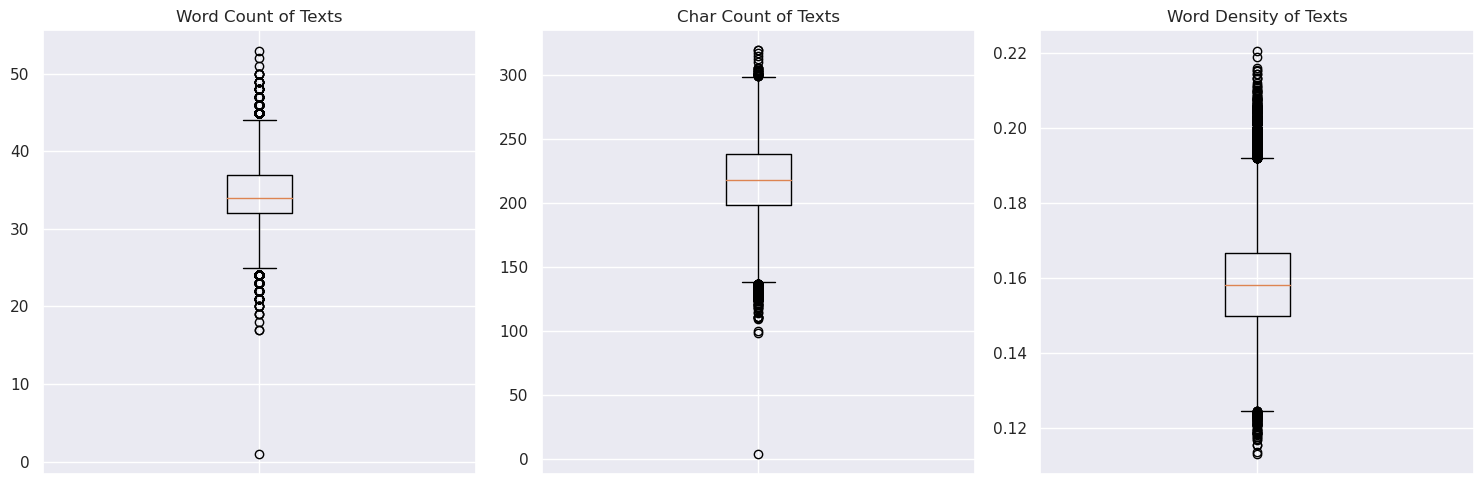

In [18]:
#Feature Distribution of Text
plot_vars=np.array([[ 'text_word_count', 'text_char_count','text_word_density']])

plot_boxplots(cleaned_data, plot_vars, labels_dict, figsize=(9,4))


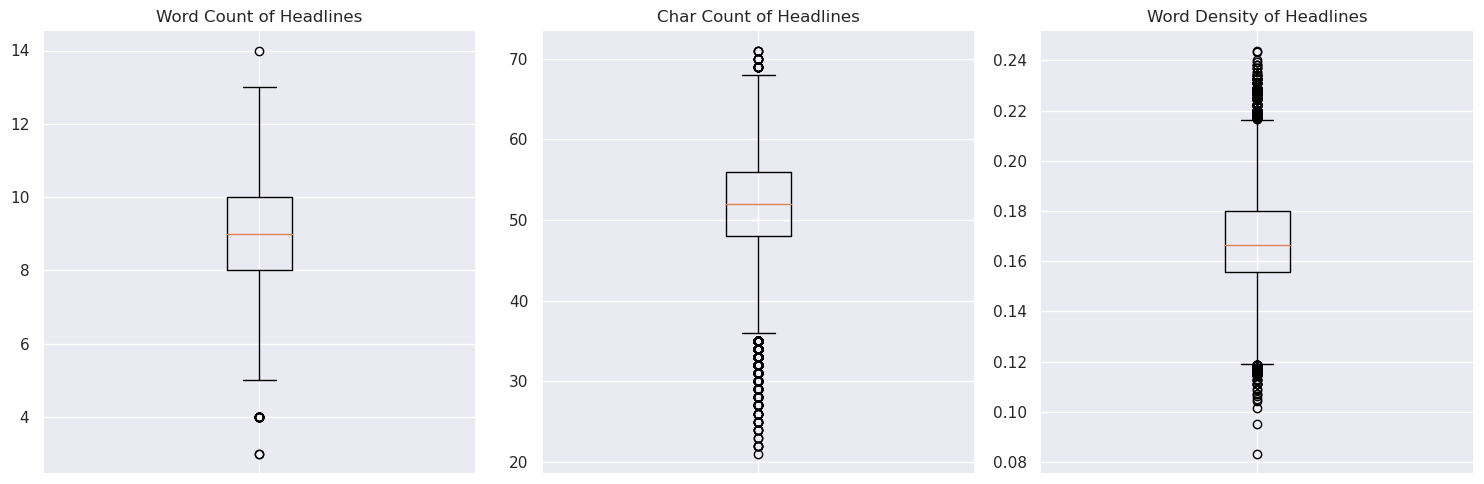

In [19]:
#Feature Distribution of Headlines
plot_vars=np.array([['headline_word_count', 'headline_char_count','headline_word_density']])

plot_boxplots(cleaned_data, plot_vars, labels_dict, figsize=(9,4))

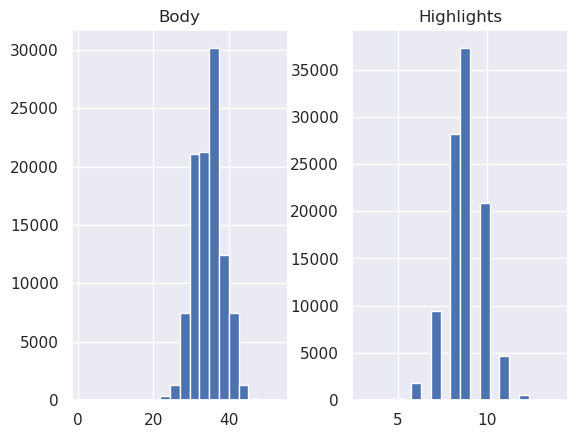

In [20]:
import matplotlib.pyplot as plt

text_word_count = []
headline_word_count = []

for i in cleaned_data['text']:
      text_word_count.append(len(i.split()))

for i in cleaned_data['headlines']:
      headline_word_count.append(len(i.split()))

length_df = pd.DataFrame({'Body':text_word_count, 'Highlights':headline_word_count})
length_df.hist(bins = 20)
plt.show()

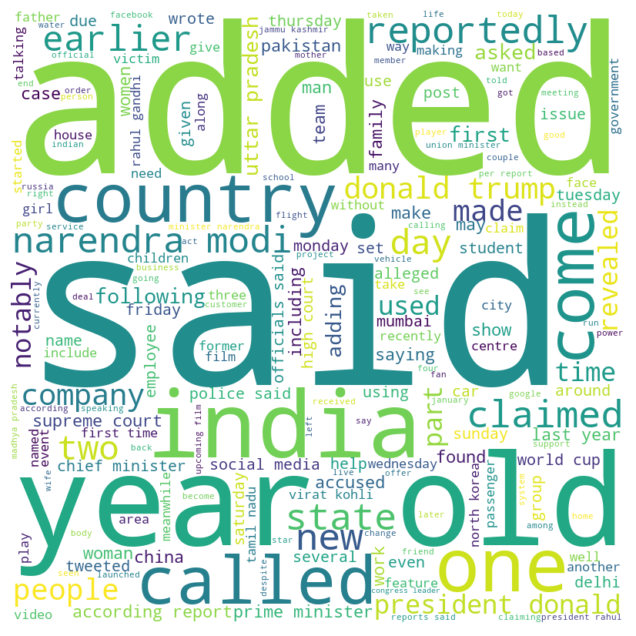

In [21]:
from wordcloud import WordCloud

text = ' '.join(cleaned_data['text'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

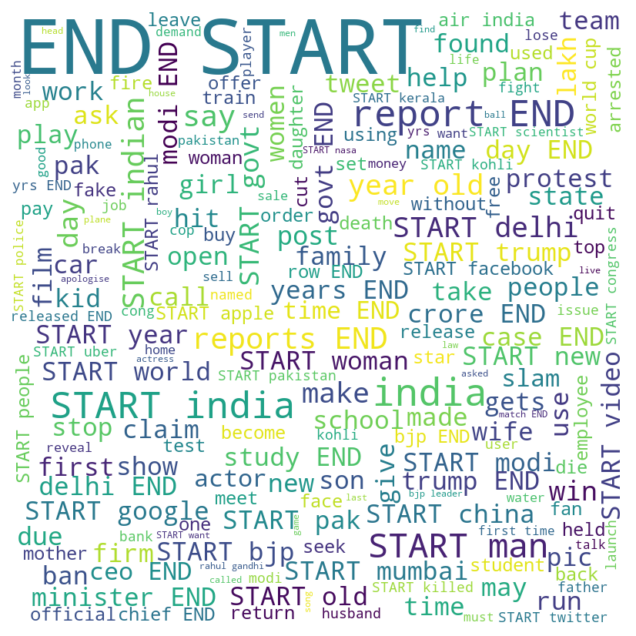

In [22]:
from wordcloud import WordCloud

text = ' '.join(cleaned_data['headlines'].tolist())
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 4.TOKENIZATION AND TRAIN-TEST SPLIT

In [23]:
import keras
from keras import backend as K
from keras.layers import Layer
from keras.layers import Concatenate
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, TimeDistributed, LSTM, Embedding, Input
from keras import Model

In [24]:
#splitting data into 80-20 ratio as train and test data
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['text'], cleaned_data['headlines'], test_size=0.2, random_state=0)

#Keras tokenizer for news text.
tokenizer_news = Tokenizer()
tokenizer_news.fit_on_texts(list(X_train))
x_train_seq = tokenizer_news.texts_to_sequences(X_train)
x_test_seq = tokenizer_news.texts_to_sequences(X_test)
#padding short texts with 0s.
x_train_pad = pad_sequences(x_train_seq, maxlen=news_length, padding='post') 
x_test_pad = pad_sequences(x_test_seq, maxlen=news_length, padding='post')
#Vocab size of texts.
news_vocab = len(tokenizer_news.word_index) + 1

#Keras Tokenizer for summaries.
tokenizer_headline = Tokenizer()
tokenizer_headline.fit_on_texts(list(y_train))
y_train_seq = tokenizer_headline.texts_to_sequences(y_train)
y_test_seq = tokenizer_headline.texts_to_sequences(y_test)
y_train_pad = pad_sequences(y_train_seq, maxlen=headline_length, padding='post')
y_test_pad = pad_sequences(y_test_seq, maxlen=headline_length, padding='post')
#Vocab size of summaries.
headline_vocab = len(tokenizer_headline.word_index) + 1

#### 5. ATTENTION LAYER

In [25]:
class AttentionLayer(Layer):
    def __init__(self, **kwargs): #-----> to inherit the layer class from keras
        super(AttentionLayer, self).__init__(**kwargs)
    def build(self, input_shape):#------> function to create trainable weights w1,w2,w3
        assert isinstance(input_shape, list)
        self.W1 = self.add_weight(name='W1',shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W2 = self.add_weight(name='w2',shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),initializer='uniform',trainable=True)
        self.W3 = self.add_weight(name='w3',shape=tf.TensorShape((input_shape[0][2], 1)),initializer='uniform',trainable=True)
        super(AttentionLayer, self).build(input_shape)  

    def call(self, inputs, verbose=False):
    
        #inputs for this function: [encoder_output_sequence, decoder_output_sequence]
        #outputs from this function : energy_i which is energy at step i
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):#----->function for computing energy for a single decoder state
            
            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            #shaping tensors
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            #Computing S.W1 ------> dot product of encoder output with trainable weight w1
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            W1_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W1), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W1_dot_s.shape)

            #Computing h.w2 -------> dot product of decoder with w2 weights
            W2_dot_h = K.expand_dims(K.dot(inputs, self.W2), 1)  
            if verbose:
                print('W2.h>',W2_dot_h.shape)

            #tanh(S.W1a + hj.W2a)----> concatenation based attention score calculation\
            # tanh activation will squash the values to -1 to 1 range
            reshaped_W1s_plus_W2h = K.tanh(K.reshape(W1_dot_s + W2_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_W1s_plus_W2h.shape)

            #softmax(w3.tanh(S.W1 + hj.w2)) -----> probability distribution for energy
            # calculating the attention energy at each step and dot producting with w3
            energy_i = K.reshape(K.dot(reshaped_W1s_plus_W2h, self.W3), (-1, en_seq_len))
            energy_i = K.softmax(energy_i)

            if verbose:
                print('energy at i>', energy_i.shape)

            return energy_i, [energy_i]

        def context_step(inputs, states):#------> function to calculate context vector at each stage
            #this function outputs the context vector at each stage
            context_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return context_i, [context_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  
            fake_state = K.sum(fake_state, axis=[1, 2])
            fake_state = K.expand_dims(fake_state)
            fake_state = K.tile(fake_state, [1, hidden_size])
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1]) 

        #Computing energy outputs
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],)

        #Computing context vectors 
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],)

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        #reshaping Outputs produced by the layer
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

 #### 6.MODEL-1 WITH TWO LSTM LAYERS FOR ENCODER, ONE LSTM LAYER FOR DECODER

##### 6.1 MODEL ARCHITECTURE

In [26]:
K.clear_session()

embedding_dim = 200 #Size of word embeddings.
latent_dim = 300 #Number of neurons in LSTM layer.

#Embedding Layer
encoder_input = Input(shape=(news_length, ))
encoder_embedding = Embedding(news_vocab, embedding_dim, trainable=True)(encoder_input) 

#Two LSTM layers ----> encoder.
e_lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_1, a_1, c_1 = e_lstm1(encoder_embedding)
e_lstm2 = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
encoder_output, a_enc, c_enc = e_lstm2(y_1)

#Single LSTM layer ----> decoder 
decoder_input = Input(shape=(None,))
decoder_embedding = Embedding(headline_vocab, embedding_dim, trainable=True)(decoder_input)
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_output, decoder_fwd, decoder_back = decoder_lstm(decoder_embedding, initial_state=[a_enc, c_enc]) #Final output states of encoder last layer are fed into decoder.

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_output, decoder_output]) 

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output, attn_out])
#dense time distributed layer with softw=max fucntion for predicting the next word
decoder_dense = TimeDistributed(Dense(headline_vocab, activation='softmax'))
decoder_output = decoder_dense(decoder_concat_input)

#creating model
model1 = Model([encoder_input, decoder_input], decoder_output)
model1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 53)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 53, 200)      13925400    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 53, 300),    601200      ['embedding[0][0]']              
                                 (None, 300),                                                 

##### 6.2 MODEL TRAINING -  RMSPROP OPTIMIZER, BATCH SIZE 128, 20 EPOCHS

In [27]:
model1.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
history = model1.fit([x_train_pad, y_train_pad[:,:-1]], 
                    y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:,1:], 
                    epochs=10, batch_size=700, 
                    validation_data=([x_test_pad, y_test_pad[:,:-1]], 
                                     y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:,1:]))


Epoch 1/10
118/118 [==============================] - 134s 1s/step - loss: 5.3078 - val_loss: 4.7195
Epoch 2/10
118/118 [==============================] - 111s 938ms/step - loss: 4.7159 - val_loss: 4.5164
Epoch 3/10
118/118 [==============================] - 107s 902ms/step - loss: 4.5943 - val_loss: 4.4780
Epoch 4/10
118/118 [==============================] - 106s 898ms/step - loss: 4.5733 - val_loss: 4.4707
Epoch 5/10
118/118 [==============================] - 104s 881ms/step - loss: 4.5633 - val_loss: 4.4625
Epoch 6/10
118/118 [==============================] - 102s 869ms/step - loss: 4.5560 - val_loss: 4.4573
Epoch 7/10
118/118 [==============================] - 102s 869ms/step - loss: 4.5506 - val_loss: 4.4623
Epoch 8/10
118/118 [==============================] - 102s 863ms/step - loss: 4.5424 - val_loss: 4.4510
Epoch 9/10
118/118 [==============================] - 102s 861ms/step - loss: 4.5217 - val_loss: 4.4256
Epoch 10/10
118/118 [==============================] - 101s 856ms/s

##### 6.3 GENERATING HEADLINES ON TEST DATA

In [28]:
#Encoder inference model with trained inputs and outputs.
encoder_model1 = Model(inputs=encoder_input, outputs=[encoder_output,a_enc,c_enc])

#Initialising state vectors for decoder.
decoder_initial_state_a = Input(shape=(latent_dim,))
decoder_initial_state_c = Input(shape=(latent_dim,))
decoder_hidden_state = Input(shape=(news_length, latent_dim))

#Decoder inference model
decoder_out, decoder_a, decoder_c = decoder_lstm(decoder_embedding, initial_state=[decoder_initial_state_a, decoder_initial_state_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state, decoder_out])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_out, attn_out_inf])

decoder_final = decoder_dense(decoder_inf_concat)
decoder_model1 = Model([decoder_input]+[decoder_hidden_state, decoder_initial_state_a, decoder_initial_state_c], [decoder_final]+[decoder_a, decoder_c])

In [29]:
#Function to generate output summaries.
def decoded_sequence_m1(input_seq):
    encoder_out, encoder_a, encoder_c = encoder_model1.predict(input_seq) #Collecting output from encoder inference model.
    #Initialise input to decoder neuron with START token. Thereafter output token predicted by each neuron will be used as input for the subsequent.
    #Single elt matrix used for maintaining dimensions.
    next_input = np.zeros((1,1))
    next_input[0,0] = tokenizer_headline.word_index['start']
    output_seq = ''
    #Stopping condition to terminate loop when one summary is generated.
    stop = False
    while not stop:
        #Output from decoder inference model, with output states of encoder used for initialisation.
        decoded_out, trans_state_a, trans_state_c = decoder_model1.predict([next_input] + [encoder_out, encoder_a, encoder_c])
        #Get index of output token from y(t) of decoder.
        output_idx = np.argmax(decoded_out[0, -1, :])
        #If output index corresponds to END token, summary is terminated without of course adding the END token itself.
        if output_idx == tokenizer_headline.word_index['end']: 
            stop = True
        elif output_idx>0 and output_idx != tokenizer_headline.word_index['start'] :
            output_token = tokenizer_headline.index_word[output_idx] #Generate the token from index.
            output_seq = output_seq + ' ' + output_token #Append to summary
        
        #Pass the current output index as input to next neuron.
        next_input[0,0] = output_idx
        #Continously update the transient state vectors in decoder.
        encoder_a, encoder_c = trans_state_a, trans_state_c
        
    return output_seq        

In [30]:
#Print predicted summmaries and actual summaries for 60 texts. 

predicted_m1 = []
for i in range(50):
    print('Information:', X_test.iloc[i])
    print('Actual Headline:', y_test.iloc[i])
    print('Predicted Headline:', decoded_sequence_m1(x_test_pad[i].reshape(1, news_length)))
    predicted_m1.append(decoded_sequence_m1(x_test_pad[i].reshape(1, news_length)).split())

Information: qualcomm monday announced chinese court order banning import sale apple iphone iphone models china due software patent violations court found apple violated two qualcomm software patents around resizing photographs managing applications touchscreen apple however said iphones remain sale china
Actual Headline: <START> qualcomm wins import ban apple iphones china <END>
1/1 [==============================] - 0s 21ms/step
Predicted Headline:  govt govt startup crore
1/1 [==============================] - 0s 22ms/step
Information: congress appointed year old amit chavda new chief gujarat unit replacing year old bharatsinh solanki held post since december comes days congress president rahul gandhi said younger generations come forward take party leadership inspired gandhi words year old shantaram naik resigned goa congress chief
Actual Headline: <START> congress appoints old amit chavda new gujarat head <END>
1/1 [==============================] - 0s 22ms/step
Predicted Headline

In [31]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
df = pd.DataFrame(columns=['Information', 'Actual Headline', 'Predicted Headline'])

for i in range(50):
    information = X_test.iloc[i]
    actual_headline = y_test.iloc[i]
    predicted_headline = decoded_sequence_m1(x_test_pad[i].reshape(1, news_length))

    row = {'Information': information, 'Actual Headline': actual_headline, 'Predicted Headline': predicted_headline}
    df = df.append(row, ignore_index=True)

display(df)


1/1 [==============================] - 0s 24ms/step


,Information,Actual Headline,Predicted Headline
0,qualcomm monday announced chinese court order banning import sale apple iphone iphone models china due software patent violations court found apple violated two qualcomm software patents around resizing photographs managing applications touchscreen apple however said iphones remain sale china,<START> qualcomm wins import ban apple iphones china <END>,govt govt startup crore
1,congress appointed year old amit chavda new chief gujarat unit replacing year old bharatsinh solanki held post since december comes days congress president rahul gandhi said younger generations come forward take party leadership inspired gandhi words year old shantaram naik resigned goa congress chief,<START> congress appoints old amit chavda new gujarat head <END>,man man world world
2,male nurse employed delhi institute liver biliary sciences booked allegedly stealing government hospital stents selling private hospitals kerala hospital provided stents subsidised rate man associates allegedly helped fabricate false documents hide tracks,<START> nurse sells stents worth stolen hospital <END>,man man world world
3,finance minister arun jaitley announced government develop scheme assign every major small enterprise india unique presenting budget said scheme along lines aadhaar provided identity every indian eased delivery public services,<START> govt announces aadhaar like unique businesses <END>,google shares startup crore
4,international organization migration slammed social media giants like facebook failing tackle human trafficking platform smugglers often use facebook reach migrants false promises jobs europe iom spokesperson leonard doyle said traffickers use whatsapp send videos tortured migrants families extortion added,<START> slams facebook failing tackle human trafficking <END>,google govt startup crore
5,ahead budget session parliamentary affairs minister ananth kumar sunday said government everything possible get triple talaq bill passed parliament bill seeks criminalise practise instant triple talaq passed lok sabha winter session got stalled rajya sabha,<START> everything get triple talaq bill passed govt <END>,govt govt startup crore
6,university tokyo scientists recently revealed created world strongest indoor magnetic field revealed deliberately blew equipment create record measuring tesla field strength times higher generated magnets mri machines million times stronger earth magnetic field,<START> scientists blew equipment create strongest magnetic field <END>,google govt startup crore
7,mosque kerala hosted parents around candidates arrived state give neet medical entrance exam apart mosque could also accommodate people nearby houses shops well mosque officials said mosque offered shelter food parents accompanying candidates last year well,<START> kerala mosque hosts parents neet candidates <END>,govt govt first crore
8,levi strauss sued louis vuitton maker lvmh unit kenzo trademark infringement kenzo allegedly used levi federally protected tab array garments including new clothing line featuring singer britney spears levi said put distinctive tabs bearing name attached garments pockets since sight identification products,<START> levi sues louis vuitton maker unit trademark breach <END>,google govt startup crore
9,kannada actor politician upendra karnataka pragnyavantha janatha paksha unveiled green yellow auto rickshaw party symbol auto signifies running aim government chosen people support run without problems said unveiling symbol party launched earlier year,<START> kannada actor upendra unveils auto rickshaw party symbol <END>,google ceo startup crore


##### 6.4 EVALUATION : BLEU AND ROUGE

In [32]:
#creating reference list
summaries = list(y_test)
references = []
for summ in summaries:
    ref = summ.split()
    ref.remove('<START>')
    ref.remove('<END>')
    references.append(ref)

In [33]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

smooth = SmoothingFunction().method4
total_score = 0.0

for i in range(len(predicted_m1)):
    refs = references[:i] + references[i+1:]
    score = sentence_bleu(refs, predicted_m1[i], weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth)
    total_score += score

avg_score_m1 = total_score / len(predicted_m1)
print("Average BLEU score:", avg_score_m1)


Average BLEU score: 0.28912999526833116


In [34]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(columns=['Actual Headline','Predicted Headline', 'BLEU Score'])
refs = []
smooth = SmoothingFunction().method4
for i in range(50):
    refs.append(references[i])
    predicted_headline = predicted_m1[i]
    bleu_score = sentence_bleu(refs, predicted_headline, weights=(0.25,0.25,0.25,0.25))

    row = {'Actual Headline':refs,'Predicted Headline': predicted_m1[i], 'BLEU Score': sentence_bleu(refs, predicted_m1[i], weights=(0.25,0.25,0.25,0.25))}
    df = df.append(row, ignore_index=True)

    refs = []  # reset refs to an empty list for the next iteration

display(df.sort_values(by='BLEU Score', ascending=False))



/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Actual Headline,Predicted Headline,BLEU Score
27,"[[kerala, govt, challenge, sabarimala, verdict]]","[indian, govt, first, world]",0.550695
44,"[[women, world, number, knocked, open]]","[man, man, world, world]",0.550695
29,"[[shilpa, shetty, invests, gurugram, baby, care, startup]]","[google, ceo, startup, film]",0.334014
5,"[[everything, get, triple, talaq, bill, passed, govt]]","[govt, govt, startup, crore]",0.334014
32,"[[apple, google, used, car, test, self, driving, tech]]","[google, ceo, startup, film]",0.26013
22,"[[first, ever, hat, trick, cricket, world, cup, taken, indian]]","[man, man, world, world]",0.202589
36,"[[pak, govt, army, want, civilised, ties, india, imran, khan]]","[modi, govt, first, world]",0.202589
37,"[[watermelon, snow, spotted, glacier]]","[google, govt, startup, crore]",0
28,"[[harvard, sued, rating, asian, americans, low, personality]]","[govt, govt, startup, crore]",0
30,"[[naxals, set, ablaze, six, vehicles, maharashtra]]","[man, man, world, world]",0


In [35]:
def rouge_1_score(hypothesis, reference):
    common = set(hypothesis).intersection(set(reference))
    rouge_1 = len(common) / len(reference)
    return rouge_1

In [36]:
r1_scores_m1 = []

for x in range(10):
    r1_scores_m1.append(rouge_1_score(predicted_m1[x],references[x]))
    
r1_scores_m1 = np.array(r1_scores_m1)
r1_scores_m1.mean()

0.014285714285714285

#### 7.MODEL 2 - WITH THREE LSTM LAYERS FOR ENCODER, ONE LSTM LAYER FOR DECODER AND TWEAKED PARAMETERS

##### 7.1 MODEL ARCHITECTURE

In [37]:
K.clear_session()

embedding_dim = 200 #Size of word embeddings.
latent_dim2 = 400 #Number of neurons in LSTM layer.

#Embedding Layer
encoder_input2 = Input(shape=(news_length, ))
encoder_embedding2 = Embedding(news_vocab, embedding_dim, trainable=True)(encoder_input2) 

#Three LSTM layers ----> encoder.
e_lstm1 = LSTM(latent_dim2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_1, a_1, c_1 = e_lstm1(encoder_embedding2)
e_lstm2 = LSTM(latent_dim2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_2, a_2, c_2 = e_lstm2(y_1)
e_lstm3 = LSTM(latent_dim2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
y_3, a_3, c_3 = e_lstm3(y_2)
e_lstm4 = LSTM(latent_dim2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
encoder_output2, a_enc2, c_enc2 = e_lstm4(y_3)

#Single LSTM layer ----> decoder 
decoder_input2 = Input(shape=(None,))
decoder_embedding2 = Embedding(headline_vocab, embedding_dim, trainable=True)(decoder_input2)
decoder_lstm2 = LSTM(latent_dim2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_output2, decoder_fwd, decoder_back = decoder_lstm2(decoder_embedding2, initial_state=[a_enc2, c_enc2]) #Final output states of encoder last layer are fed into decoder.

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_output2, decoder_output2]) 

#concatenating decoder input to attention layer output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output2, attn_out])
#dense time distributed layer with softw=max fucntion for predicting the next word
decoder_dense = TimeDistributed(Dense(headline_vocab, activation='softmax'))
decoder_output2 = decoder_dense(decoder_concat_input)

#creating model
model2 = Model([encoder_input2, decoder_input2], decoder_output2)
model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 53)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 53, 200)      13925400    ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 53, 400),    961600      ['embedding[0][0]']              
                                 (None, 400),                                                     
                                 (None, 400)]                                                     
                                                                                              

##### 7.2 MODEL TRAINING - ADAM OPTIMIZER, 30 EPOCHS 

In [38]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history = model2.fit([x_train_pad, y_train_pad[:,:-1]], 
                    y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:,1:], 
                    epochs=20, batch_size=512, 
                    validation_data=([x_test_pad, y_test_pad[:,:-1]], 
                                     y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:,1:]))


Epoch 1/20
161/161 [==============================] - 256s 1s/step - loss: 4.9822 - val_loss: 4.4589
Epoch 2/20
161/161 [==============================] - 224s 1s/step - loss: 4.5292 - val_loss: 4.4037
Epoch 3/20
161/161 [==============================] - 217s 1s/step - loss: 4.3953 - val_loss: 4.2435
Epoch 4/20
161/161 [==============================] - 216s 1s/step - loss: 4.1123 - val_loss: 3.9067
Epoch 5/20
161/161 [==============================] - 213s 1s/step - loss: 3.7551 - val_loss: 3.6735
Epoch 6/20
161/161 [==============================] - 214s 1s/step - loss: 3.4516 - val_loss: 3.5190
Epoch 7/20
161/161 [==============================] - 212s 1s/step - loss: 3.1764 - val_loss: 3.4000
Epoch 8/20
161/161 [==============================] - 210s 1s/step - loss: 2.9250 - val_loss: 3.3288
Epoch 9/20
161/161 [==============================] - 213s 1s/step - loss: 2.6967 - val_loss: 3.2731
Epoch 10/20
161/161 [==============================] - 212s 1s/step - loss: 2.4898 - val_lo

##### 7.3 PREDICTIONS USING TEST DATA

In [39]:
#Encoder inference model with trained inputs and outputs.
encoder_model2 = Model(inputs=encoder_input2, outputs=[encoder_output2,a_enc2, c_enc2])

#Initialising state vectors for decoder.
decoder_initial_state_a = Input(shape=(latent_dim2,))
decoder_initial_state_c = Input(shape=(latent_dim2,))
decoder_hidden_state = Input(shape=(news_length, latent_dim2))

#Decoder inference model
decoder_out, decoder_a, decoder_c = decoder_lstm2(decoder_embedding2, initial_state=[decoder_initial_state_a, decoder_initial_state_c])
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state, decoder_out])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_out, attn_out_inf])

decoder_final = decoder_dense(decoder_inf_concat)
decoder_model2 = Model([decoder_input2]+[decoder_hidden_state, decoder_initial_state_a, decoder_initial_state_c], [decoder_final]+[decoder_a, decoder_c])

In [40]:
#Function to generate output summaries.
def decoded_sequence_m2(input_seq):
    encoder_out, encoder_a, encoder_c = encoder_model2.predict(input_seq) #Collecting output from encoder inference model.
    #Initialise input to decoder neuron with START token. Thereafter output token predicted by each neuron will be used as input for the subsequent.
    #Single elt matrix used for maintaining dimensions.
    next_input = np.zeros((1,1))
    next_input[0,0] = tokenizer_headline.word_index['start']
    output_seq = ''
    #Stopping condition to terminate loop when one summary is generated.
    stop = False
    while not stop:
        #Output from decoder inference model, with output states of encoder used for initialisation.
        decoded_out, trans_state_a, trans_state_c = decoder_model2.predict([next_input] + [encoder_out, encoder_a, encoder_c])
        #Get index of output token from y(t) of decoder.
        output_idx = np.argmax(decoded_out[0, -1, :])
        #If output index corresponds to END token, summary is terminated without of course adding the END token itself.
        if output_idx == tokenizer_headline.word_index['end']: 
            stop = True
        elif output_idx>0 and output_idx != tokenizer_headline.word_index['start'] :
            output_token = tokenizer_headline.index_word[output_idx] #Generate the token from index.
            output_seq = output_seq + ' ' + output_token #Append to summary
        
        #Pass the current output index as input to next neuron.
        next_input[0,0] = output_idx
        #Continously update the transient state vectors in decoder.
        encoder_a, encoder_c = trans_state_a, trans_state_c
        
    return output_seq        

In [41]:
predicted_m2 = []
#Print predicted summmaries and actual summaries for 60 texts. 

for i in range(50):
    predicted_m2.append(decoded_sequence_m2(x_test_pad[i].reshape(1, news_length)).split())

1/1 [==============================] - 0s 21ms/step


In [42]:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
df = pd.DataFrame(columns=['Information', 'Actual Headline', 'Predicted Headline'])

for i in range(50):
    information = X_test.iloc[i]
    actual_headline = y_test.iloc[i]
    predicted_headline = decoded_sequence_m2(x_test_pad[i].reshape(1, news_length))

    row = {'Information': information, 'Actual Headline': actual_headline, 'Predicted Headline': predicted_headline}
    df = df.append(row, ignore_index=True)

display(df)


1/1 [==============================] - 0s 21ms/step


,Information,Actual Headline,Predicted Headline
0,qualcomm monday announced chinese court order banning import sale apple iphone iphone models china due software patent violations court found apple violated two qualcomm software patents around resizing photographs managing applications touchscreen apple however said iphones remain sale china,<START> qualcomm wins import ban apple iphones china <END>,qualcomm signs patent iphones china store
1,congress appointed year old amit chavda new chief gujarat unit replacing year old bharatsinh solanki held post since december comes days congress president rahul gandhi said younger generations come forward take party leadership inspired gandhi words year old shantaram naik resigned goa congress chief,<START> congress appoints old amit chavda new gujarat head <END>,telangana son inducted congress leader son
2,male nurse employed delhi institute liver biliary sciences booked allegedly stealing government hospital stents selling private hospitals kerala hospital provided stents subsidised rate man associates allegedly helped fabricate false documents hide tracks,<START> nurse sells stents worth stolen hospital <END>,doctor worth lakh lakh litres bihar bihar hospital
3,finance minister arun jaitley announced government develop scheme assign every major small enterprise india unique presenting budget said scheme along lines aadhaar provided identity every indian eased delivery public services,<START> govt announces aadhaar like unique businesses <END>,gst rate scheme benefits budget
4,international organization migration slammed social media giants like facebook failing tackle human trafficking platform smugglers often use facebook reach migrants false promises jobs europe iom spokesperson leonard doyle said traffickers use whatsapp send videos tortured migrants families extortion added,<START> slams facebook failing tackle human trafficking <END>,facebook shuts social media standards amid facebook row
5,ahead budget session parliamentary affairs minister ananth kumar sunday said government everything possible get triple talaq bill passed parliament bill seeks criminalise practise instant triple talaq passed lok sabha winter session got stalled rajya sabha,<START> everything get triple talaq bill passed govt <END>,triple talaq bill passed union minister triple talaq bill
6,university tokyo scientists recently revealed created world strongest indoor magnetic field revealed deliberately blew equipment create record measuring tesla field strength times higher generated magnets mri machines million times stronger earth magnetic field,<START> scientists blew equipment create strongest magnetic field <END>,researchers create first ever times spinning atom
7,mosque kerala hosted parents around candidates arrived state give neet medical entrance exam apart mosque could also accommodate people nearby houses shops well mosque officials said mosque offered shelter food parents accompanying candidates last year well,<START> kerala mosque hosts parents neet candidates <END>,bihar govt clears entry teachers leave sabarimala
8,levi strauss sued louis vuitton maker lvmh unit kenzo trademark infringement kenzo allegedly used levi federally protected tab array garments including new clothing line featuring singer britney spears levi said put distinctive tabs bearing name attached garments pockets since sight identification products,<START> levi sues louis vuitton maker unit trademark breach <END>,dolce gabbana site creates clothes racist twitter
9,kannada actor politician upendra karnataka pragnyavantha janatha paksha unveiled green yellow auto rickshaw party symbol auto signifies running aim government chosen people support run without problems said unveiling symbol party launched earlier year,<START> kannada actor upendra unveils auto rickshaw party symbol <END>,rajinikanth gives lakh app selling food


##### 7.4 EVALUATION : BLEU AND ROUGE

In [43]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

smooth = SmoothingFunction().method4
total_score = 0.0

for i in range(len(predicted_m2)):
    refs = references[:i] + references[i+1:]
    score = sentence_bleu(refs, predicted_m2[i], weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth)
    total_score += score

avg_score_m2 = total_score / len(predicted_m2)
print("Average BLEU score:", avg_score_m2)


Average BLEU score: 0.33381684634461023


In [44]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(columns=['Actual Headline','Predicted Headline', 'BLEU Score'])
refs = []
smooth = SmoothingFunction().method4
for i in range(50):
    refs.append(references[i])
    predicted_headline = predicted_m2[i]
    bleu_score = sentence_bleu(refs, predicted_headline, weights=(0.25,0.25,0.25,0.25))

    row = {'Actual Headline':refs,'Predicted Headline': predicted_m2[i], 'BLEU Score': sentence_bleu(refs, predicted_m2[i], weights=(0.25,0.25,0.25,0.25))}
    df = df.append(row, ignore_index=True)

    refs = []  # reset refs to an empty list for the next iteration

display(df.sort_values(by='BLEU Score', ascending=False))


/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Actual Headline,Predicted Headline,BLEU Score
42,"[[complaint, diljit, dosanjh, glorifying, dog, fights]]","[diljit, dosanjh, glorifying, dog, fights, dog]",0.759836
46,"[[metro, cards, swiped, pay, bus, fares, delhi]]","[delhi, metro, commuters, protest, metro, fare, hike]",0.731110
12,"[[urged, rahul, early, decision, taka, cabinet, expansion]]","[rahul, gandhi, working, bjp, ruled, taka, polls]",0.731110
27,"[[kerala, govt, challenge, sabarimala, verdict]]","[kerala, govt, plans, ban, sabarimala, verdict]",0.718608
29,"[[shilpa, shetty, invests, gurugram, baby, care, startup]]","[milind, soman, invests, old, baby, startup]",0.711803
2,"[[nurse, sells, stents, worth, stolen, hospital]]","[doctor, worth, lakh, lakh, litres, bihar, bihar, hospital]",0.707107
44,"[[women, world, number, knocked, open]]","[open, open, open, record, year]",0.668740
47,"[[loveratri, demeaning, towards, culture, salman]]","[would, like, romance, come, come, salman]",0.638943
31,"[[jio, institute, projects, student, fee, year]]","[jio, offer, free, wifi, people, crore]",0.638943
48,"[[khand, release, life, term, convicts, year, jail]]","[jailed, yrs, jail, sentence, bhopal, man, returns]",0.614788


In [45]:
r1_scores_m2 = []

for x in range(50):
    r1_scores_m2.append(rouge_1_score(predicted_m2[x],references[x]))
    
r1_scores_m2 = np.array(r1_scores_m2)
r1_scores_m2.mean()

0.17180952380952377

#### 8. MODEL-3 TWO LSTM ENCODER ONE LSTM DECODER GLOVE PRETRAINED EMBEDDINGS

##### 8.1 MODEL ARCHITECTURE

In [46]:


# Define the tokenizer and fit on the news data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_data['text'])

# Define the maximum length of news and headlines
news_length = max([len(text.split()) for text in cleaned_data['headlines']])
headline_length = max([len(text.split()) for text in cleaned_data['headlines']])

# Load the pretrained GloVe word embeddings
embeddings_index = {}
with open('/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Create the embedding matrix for the news vocabulary
news_vocab = len(tokenizer.word_index) + 1
embedding_dim = 200
embedding_matrix = np.zeros((news_vocab, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Define the embedding layer with the pretrained GloVe embedding matrix
embedding_layer = Embedding(news_vocab, embedding_dim, weights=[embedding_matrix], input_length=news_length, trainable=True)

# Define the model architecture with the embedding layer
K.clear_session()

latent_dim3 = 256

# Input layer
encoder_input3 = Input(shape=(news_length,))
decoder_input3 = Input(shape=(None,))

# Encoder layers
encoder_embedding3 = embedding_layer(encoder_input3)
enc_lstm1 = LSTM(latent_dim3, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
enc_output1, state_h1, state_c1 = enc_lstm1(encoder_embedding3)
enc_lstm2 = LSTM(latent_dim3, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
encoder_output3, state_h, state_c = enc_lstm2(enc_output1)

# Decoder layers
decoder_embedding3 = embedding_layer(decoder_input3)
decoder_lstm3 = LSTM(latent_dim3, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
decoder_output3, _, _ = decoder_lstm3(decoder_embedding3, initial_state=[state_h, state_c])

# Attention layer
attention_layer = AttentionLayer(name='attention_layer')
attention_output, attention_states = attention_layer([encoder_output3, decoder_output3])

# Concatenate attention output and decoder output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_output3, attention_output])

# Dense layer to predict the next word
decoder_dense = TimeDistributed(Dense(news_vocab, activation='softmax'))
decoder_output3 = decoder_dense(decoder_concat_input)

# Define the model
model3 = Model([encoder_input3, decoder_input3], decoder_output3)
model3.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 embedding_2 (Embedding)        multiple             15262000    ['input_1[0][0]',                
                                                                  'input_2[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 14, 256),    467968      ['embedding_2[0][0]']        

##### 8.2 TRAINING MODEL - ADAM OPTIMIZER, EPOCHS 15

In [47]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# pad x_train_pad and x_test_pad to have length 14
x_train_pad = pad_sequences(x_train_pad, maxlen=14, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_pad, maxlen=14, padding='post', truncating='post')


model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history = model3.fit([x_train_pad, y_train_pad[:,:-1]], 
                    y_train_pad.reshape(y_train_pad.shape[0], y_train_pad.shape[1], 1)[:,1:], 
                    epochs=15, batch_size=128, 
                    validation_data=([x_test_pad, y_test_pad[:,:-1]], 
                                     y_test_pad.reshape(y_test_pad.shape[0], y_test_pad.shape[1], 1)[:,1:]))


Epoch 1/15
644/644 [==============================] - 244s 363ms/step - loss: 4.7077 - val_loss: 4.1135
Epoch 2/15
644/644 [==============================] - 210s 327ms/step - loss: 3.9078 - val_loss: 3.5730
Epoch 3/15
644/644 [==============================] - 212s 330ms/step - loss: 3.3584 - val_loss: 3.2934
Epoch 4/15
644/644 [==============================] - 212s 330ms/step - loss: 2.9403 - val_loss: 3.1568
Epoch 5/15
644/644 [==============================] - 213s 331ms/step - loss: 2.6126 - val_loss: 3.0829
Epoch 6/15
644/644 [==============================] - 214s 333ms/step - loss: 2.3510 - val_loss: 3.0385
Epoch 7/15
644/644 [==============================] - 213s 331ms/step - loss: 2.1433 - val_loss: 3.0190
Epoch 8/15
644/644 [==============================] - 213s 331ms/step - loss: 1.9812 - val_loss: 3.0048
Epoch 9/15
644/644 [==============================] - 213s 331ms/step - loss: 1.8455 - val_loss: 3.0063
Epoch 10/15
644/644 [==============================] - 213s 331m

##### 8.3 PREDICTIONS USING TEST DATA

In [48]:
#Encoder inference model with trained inputs and outputs.
encoder_model3 = Model(inputs=encoder_input3, outputs=[encoder_output3, state_h, state_c])

#Initialising state vectors for decoder.
decoder_initial_state_a = Input(shape=(latent_dim3,))
decoder_initial_state_c = Input(shape=(latent_dim3,))
decoder_hidden_state = Input(shape=(news_length, latent_dim3))

#Decoder inference model
decoder_out, decoder_a, decoder_c = decoder_lstm3(decoder_embedding3, initial_state=[decoder_initial_state_a, decoder_initial_state_c])
attn_out_inf, attn_states_inf = attention_layer([decoder_hidden_state, decoder_out])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_out, attn_out_inf])

decoder_final = decoder_dense(decoder_inf_concat)
decoder_model3 = Model([decoder_input3]+[decoder_hidden_state, decoder_initial_state_a, decoder_initial_state_c], [decoder_final]+[decoder_a, decoder_c])

In [49]:
#Function to generate output summaries.
def decoded_sequence_m3(input_seq):
    encoder_out, encoder_a, encoder_c = encoder_model3.predict(input_seq) #Collecting output from encoder inference model.
    #Initialise input to decoder neuron with START token. Thereafter output token predicted by each neuron will be used as input for the subsequent.
    #Single elt matrix used for maintaining dimensions.
    next_input = np.zeros((1,1))
    next_input[0,0] = tokenizer_headline.word_index['start']
    output_seq = ''
    #Stopping condition to terminate loop when one summary is generated.
    stop = False
    while not stop:
        #Output from decoder inference model, with output states of encoder used for initialisation.
        decoded_out, trans_state_a, trans_state_c = decoder_model3.predict([next_input] + [encoder_out, encoder_a, encoder_c])
        #Get index of output token from y(t) of decoder.
        output_idx = np.argmax(decoded_out[0, -1, :])
        #If output index corresponds to END token, summary is terminated without of course adding the END token itself.
        if output_idx == tokenizer_headline.word_index['end']: 
            stop = True
        elif output_idx>0 and output_idx != tokenizer_headline.word_index['start'] :
            output_token = tokenizer_headline.index_word[output_idx] #Generate the token from index.
            output_seq = output_seq + ' ' + output_token #Append to summary
        
        #Pass the current output index as input to next neuron.
        next_input[0,0] = output_idx
        #Continously update the transient state vectors in decoder.
        encoder_a, encoder_c = trans_state_a, trans_state_c
        
    return output_seq        

In [50]:
predicted_m3 = []
#Print predicted summmaries and actual summaries for 60 texts. 

for i in range(50):
    predicted_m3.append(decoded_sequence_m3(x_test_pad[i].reshape(1, news_length)).split())

1/1 [==============================] - 0s 41ms/step


In [51]:

pd.set_option('display.max_colwidth', None)
pd.set_option('display.colheader_justify', 'right')
df = pd.DataFrame(columns=['Information', 'Actual Headline', 'Predicted Headline'])

for i in range(50):
    information = X_test.iloc[i]
    actual_headline = y_test.iloc[i]
    predicted_headline = decoded_sequence_m3(x_test_pad[i].reshape(1, news_length))

    row = {'Information': information, 'Actual Headline': actual_headline, 'Predicted Headline': predicted_headline}
    df = df.append(row, ignore_index=True)

display(df)


1/1 [==============================] - 0s 24ms/step


,Information,Actual Headline,Predicted Headline
0,qualcomm monday announced chinese court order banning import sale apple iphone iphone models china due software patent violations court found apple violated two qualcomm software patents around resizing photographs managing applications touchscreen apple however said iphones remain sale china,<START> qualcomm wins import ban apple iphones china <END>,qualcomm rejects iphone stop sale china court
1,congress appointed year old amit chavda new chief gujarat unit replacing year old bharatsinh solanki held post since december comes days congress president rahul gandhi said younger generations come forward take party leadership inspired gandhi words year old shantaram naik resigned goa congress chief,<START> congress appoints old amit chavda new gujarat head <END>,year old congress mla quits gujarat rajkot
2,male nurse employed delhi institute liver biliary sciences booked allegedly stealing government hospital stents selling private hospitals kerala hospital provided stents subsidised rate man associates allegedly helped fabricate false documents hide tracks,<START> nurse sells stents worth stolen hospital <END>,delhi doctors vandalised hospital demanding dowry
3,finance minister arun jaitley announced government develop scheme assign every major small enterprise india unique presenting budget said scheme along lines aadhaar provided identity every indian eased delivery public services,<START> govt announces aadhaar like unique businesses <END>,govt allocates provide mandatory rate
4,international organization migration slammed social media giants like facebook failing tackle human trafficking platform smugglers often use facebook reach migrants false promises jobs europe iom spokesperson leonard doyle said traffickers use whatsapp send videos tortured migrants families extortion added,<START> slams facebook failing tackle human trafficking <END>,internet social media slammed due privacy concerns
5,ahead budget session parliamentary affairs minister ananth kumar sunday said government everything possible get triple talaq bill passed parliament bill seeks criminalise practise instant triple talaq passed lok sabha winter session got stalled rajya sabha,<START> everything get triple talaq bill passed govt <END>,centre need shake system reshuffle
6,university tokyo scientists recently revealed created world strongest indoor magnetic field revealed deliberately blew equipment create record measuring tesla field strength times higher generated magnets mri machines million times stronger earth magnetic field,<START> scientists blew equipment create strongest magnetic field <END>,world powerful people earth occur world
7,mosque kerala hosted parents around candidates arrived state give neet medical entrance exam apart mosque could also accommodate people nearby houses shops well mosque officials said mosque offered shelter food parents accompanying candidates last year well,<START> kerala mosque hosts parents neet candidates <END>,kerala mosque invites kids wedding marks
8,levi strauss sued louis vuitton maker lvmh unit kenzo trademark infringement kenzo allegedly used levi federally protected tab array garments including new clothing line featuring singer britney spears levi said put distinctive tabs bearing name attached garments pockets since sight identification products,<START> levi sues louis vuitton maker unit trademark breach <END>,louis vuitton maker louis vuitton stockpile luxury spirits
9,kannada actor politician upendra karnataka pragnyavantha janatha paksha unveiled green yellow auto rickshaw party symbol auto signifies running aim government chosen people support run without problems said unveiling symbol party launched earlier year,<START> kannada actor upendra unveils auto rickshaw party symbol <END>,kannada actor taka minister ambareesh gupta spotted


##### 8.4 EVALUATION : BLEU AND ROUGE

In [52]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

smooth = SmoothingFunction().method4
total_score = 0.0

for i in range(len(predicted_m3)):
    refs = references[:i] + references[i+1:]
    score = sentence_bleu(refs, predicted_m3[i], weights=(0.25,0.25,0.25,0.25), smoothing_function=smooth)
    total_score += score

avg_score_m3 = total_score / len(predicted_m3)
print("Average BLEU score:", avg_score_m3)


Average BLEU score: 0.3241005644390709


In [53]:
pd.set_option('display.max_colwidth', None)
df = pd.DataFrame(columns=['Actual Headline','Predicted Headline', 'BLEU Score'])
refs = []
smooth = SmoothingFunction().method4
for i in range(50):
    refs.append(references[i])
    predicted_headline = predicted_m3[i]
    bleu_score = sentence_bleu(refs, predicted_headline, weights=(0.25,0.25,0.25,0.25))

    row = {'Actual Headline':refs,'Predicted Headline': predicted_m3[i], 'BLEU Score': sentence_bleu(refs, predicted_m3[i], weights=(0.25,0.25,0.25,0.25))}
    df = df.append(row, ignore_index=True)

    refs = []  # reset refs to an empty list for the next iteration

display(df.sort_values(by='BLEU Score', ascending=False))


/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/opt/conda/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 4-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


,Actual Headline,Predicted Headline,BLEU Score
11,"[[bought, chris, gayle, back, kings, punjab, sehwag]]","[bought, kxip, bought, gayle, bought, kings, sehwag]",0.869442
27,"[[kerala, govt, challenge, sabarimala, verdict]]","[kerala, vijayan, move, court, sabarimala]",0.795271
46,"[[metro, cards, swiped, pay, bus, fares, delhi]]","[delhi, metro, buses, get, parking, bus, parking, lots]",0.782542
25,"[[never, dmk, political, enemy, dhinakaran]]","[never, beg, aiadmk, leader, ttv, dhinakaran]",0.759836
47,"[[loveratri, demeaning, towards, culture, salman]]","[loveyatri, loveratri, heroine, people, loveratri, salman]",0.759836
39,"[[labourers, travel, vote, telangana, elections]]","[labourers, dead, telangana, open, defecation, free]",0.759836
20,"[[gujarat, vijay, rupani, wins, rajkot, west]]","[bjp, candidate, gujarat, congress, rajkot, cong]",0.759836
44,"[[women, world, number, knocked, open]]","[world, halep, reaches, open, clinches, wimbledon, final]",0.731110
23,"[[year, old, buried, avalanche, minutes, survives]]","[old, boy, found, buried, alive, migrant, funeral]",0.731110
21,"[[get, well, soon, taapsee, troll, slammed, outfit]]","[know, slams, trolls, trolls, slammed, slamming, taapsee]",0.731110


In [54]:
r1_scores_m3 = []

for x in range(10):
    r1_scores_m3.append(rouge_1_score(predicted_m3[x],references[x]))
    
r1_scores_m3 = np.array(r1_scores_m3)
r1_scores_m3.mean()

0.19523809523809524

In [55]:
models = pd.DataFrame({
    'Model': ['Model 1', 'Model 2', 'Model 3'],
    'BLEU Score': [avg_score_m1, avg_score_m2, avg_score_m3],
    'ROUGE Score': [r1_scores_m1.mean(), r1_scores_m2.mean(), 
              r1_scores_m3.mean()]})
models.sort_values(by='BLEU Score', ascending=False)

,Model,BLEU Score,ROUGE Score
1,Model 2,0.333817,0.171810
2,Model 3,0.324101,0.195238
0,Model 1,0.289130,0.014286
